<h1 style = "font-size:60px; font-family:Georgia ; font-weight : normal; color : #43464b; text-align: center;">
    US Air Quality Analysis
</h1>

<p align="center">
    <img src="https://cdn.pixabay.com/photo/2016/10/22/21/54/industry-1761801_960_720.jpg" 
         style = "display: block; margin-left: auto; margin-right: auto; width: 65%;"/>
</p>

# About the Air Quality Index

The EPA developed the AQI, which reports levels of **ozone, particle pollution, and other common air
pollutants** on the same scale. An AQI reading of 101 corresponds to a level that is above the national air
quality standard—**the higher the AQI rating, the greater the health impact**.
The AQI is divided into color-coded categories, and each category is identified by a simple informative
descriptor. The descriptors are intended to convey information to the public about how air quality within
each category relates to public health. **The table below defines the AQI categories**.

Source: <a href="https://s3-us-west-1.amazonaws.com//files.airnowtech.org/airnow/docs/DailyDataFactSheet.pdf">
        EPA</a>

<img src="https://d2v9ipibika81v.cloudfront.net/uploads/sites/190/AQI-Table.png"
     style = "display: block; margin-left: auto; margin-right: auto; width: 50%;"/>

Source: <a href="https://kg.usembassy.gov/aqi-table/">
        US Embassy</a>


# Objective

The objective of this notebook is to create an ML model to accurately **forecast AQI values in the USA up to 7 days in advance**. An acceptable model will have a **maximum RSME of 20 with an ideal value of less than 13**.

<img src="https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png" 
     style = "display: block;  width: 25%;"/>

The **finished model will be embedded into *OpenAQI.io*** (not yet deployed) to provide users with accurate daily AQI forecasts.



# Content
<ul>
    <li><strong>Read In Dataset</strong></li>
    <li><strong>Sensor Locations</strong></li>
    <li><strong>AQI Trends</strong></li>
    <li><strong>Missing Measurements</strong></li>
    <li><strong>Data Preprocessing</strong></li>
    <li><strong>Model Definition</strong></li>
    <li><strong>Model Evaluation</strong></li>
    <li><strong>Conclusion</strong></li>
</ul>

# Read In Dataset

### About Each Feature
<ul>
<li><strong>CBSA Code</strong> - The core-based statistical area (CBSA) code. CBSA = a U.S. geographic area defined by the Office of Management and Budget (OMB) that consists of one or more counties.</li>
<li><strong>Date</strong> - The day of measurement.</li>
<li><strong>AQI</strong> - The average air quality index (AQI) value for the day.</li>
<li><strong>Category</strong> - The category of air quality ranging from "Good" to "Hazardous".</li>
<li><strong>Defining Parameter</strong> - One of PM2.5 (particulate matter), PM10, Ozone, Carbon Monoxide, Sulfur Dioxide, or Nitrogen Dioxide which has the highest concentration.</li>
<li><strong>Number of Sites Reporting</strong> - The number of stations used to make the data aggregation.</li>
<li><strong>city_ascii</strong> - Name of the city where the measurement was taken.</li>
<li><strong>state_id</strong> - Abbreviation of the state where the measurement was taken.</li>
<li><strong>state_name</strong> - The state where the measurement was taken.</li>
<li><strong>lat</strong> - The latitude where the measurement was taken.</li>
<li><strong>lng</strong> - The longitude where the measurement was taken.</li>
<li><strong>population</strong> - The population of the region where the measurement was taken.</li>
<li><strong>density</strong> - The population per square kilometer where the measurement was taken.</li>
<li><strong>timezone</strong> - The time zone of the region where the measurement was taken.</li>
</ul>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2024-11-27 13:12:09 -05:00)


In [2]:
!pip install parquet-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 92.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.6 MB/s eta 0:00:00
  Created wheel for halo: filename=halo-0.0.31-py3-none-any.whl size=11232 sha256=c7a9911194a64ebc365aefbb6700dda5c5d9a7f0ebb8dc6929457b27029b31a7
  Stored in directory: /root/.cache/pip/wheels/5a/d9/8a/b4f14c44aba7c164d4379eca6f1dde59360050406b1edaec24
  Created wheel for thrift: filename=thrift-0.16.0-cp310-cp310-linux_x86_64.whl size=183292 sha256=bbc419f7067446800e0a6199d61d27e4cdf21bac92bf66406b9bbe8bad78d2bf
  Stored in directory: /root/.cache/pip/wheels/52/f8/d2/acfd995e8247eb0cad372fa6a640a5fcf279ab2ed7c5c4490e
Successfully built halo thrift
  Attempting uninstall: botocore
 

In [3]:
!parquet-tools

usage: parquet-tools [-h] {show,csv,inspect} ...

parquet CLI tools

positional arguments:
  {show,csv,inspect}
    show              Show human readable format. see `show -h`
    csv               Cat csv style. see `csv -h`
    inspect           Inspect parquet file. see `inspect -h`

options:
  -h, --help          show this help message and exit
time: 1.9 s (started: 2024-11-27 14:20:46 +00:00)


In [2]:
#read in dataset
import pandas as pd

time: 610 ms (started: 2024-11-27 13:12:17 -05:00)


In [5]:
aqi_data = pd.read_csv(r'C:\Users\andre\OneDrive\Documentos\TrabajoFinal-Grupo4CNN\US_AQI.csv', index_col=0)

time: 6.17 s (started: 2024-11-27 13:22:35 -05:00)


In [6]:
#display a sample of the dataset
aqi_data.head()

,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


time: 16 ms (started: 2024-11-27 13:22:45 -05:00)


In [7]:
#dataset summary statistics
aqi_data.describe()

,CBSA Code,AQI,Number of Sites Reporting,lat,lng,population,density
count,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06
mean,3.028285e+04,4.665572e+01,3.650273e+00,3.849210e+01,-9.425695e+01,5.642292e+05,1.083637e+03
std,1.142715e+04,3.570811e+01,5.092484e+00,5.595372e+00,1.678664e+01,1.537382e+06,1.013632e+03
min,1.010000e+04,0.000000e+00,1.000000e+00,1.797430e+01,-1.593521e+02,1.903000e+03,4.000000e+00
25%,2.010000e+04,3.000000e+01,1.000000e+00,3.494420e+01,-1.069642e+02,2.843700e+04,5.250000e+02
50%,3.034000e+04,4.100000e+01,2.000000e+00,3.918860e+01,-8.893420e+01,1.225490e+05,8.340000e+02
75%,4.042000e+04,5.400000e+01,4.000000e+00,4.211550e+01,-8.154200e+01,3.913710e+05,1.255000e+03
max,4.974000e+04,2.064600e+04,7.200000e+01,6.483530e+01,-6.606100e+01,1.868002e+07,1.076800e+04


time: 1 s (started: 2024-11-27 13:22:47 -05:00)


In [9]:
aqi_data.to_parquet(r"C:\Users\andre\OneDrive\Documentos\TrabajoFinal-Grupo4CNN\US_AQI.parquet")

time: 5.17 s (started: 2024-11-27 13:23:10 -05:00)


In [10]:
!parquet-tools inspect "/kaggle/working/US_AQI_PARK.parquet"

time: 31 ms (started: 2024-11-27 13:23:23 -05:00)


"parquet-tools" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [12]:
aqi_data = pd.read_parquet(r"C:\Users\andre\OneDrive\Documentos\TrabajoFinal-Grupo4CNN\US_AQI.parquet")

time: 1.51 s (started: 2024-11-27 13:23:37 -05:00)


In [13]:
#display a sample of the dataset
aqi_data.head()

,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


time: 16 ms (started: 2024-11-27 13:23:40 -05:00)


In [14]:
#dataset summary statistics
aqi_data.describe()

,CBSA Code,AQI,Number of Sites Reporting,lat,lng,population,density
count,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06
mean,3.028285e+04,4.665572e+01,3.650273e+00,3.849210e+01,-9.425695e+01,5.642292e+05,1.083637e+03
std,1.142715e+04,3.570811e+01,5.092484e+00,5.595372e+00,1.678664e+01,1.537382e+06,1.013632e+03
min,1.010000e+04,0.000000e+00,1.000000e+00,1.797430e+01,-1.593521e+02,1.903000e+03,4.000000e+00
25%,2.010000e+04,3.000000e+01,1.000000e+00,3.494420e+01,-1.069642e+02,2.843700e+04,5.250000e+02
50%,3.034000e+04,4.100000e+01,2.000000e+00,3.918860e+01,-8.893420e+01,1.225490e+05,8.340000e+02
75%,4.042000e+04,5.400000e+01,4.000000e+00,4.211550e+01,-8.154200e+01,3.913710e+05,1.255000e+03
max,4.974000e+04,2.064600e+04,7.200000e+01,6.483530e+01,-6.606100e+01,1.868002e+07,1.076800e+04


time: 1.03 s (started: 2024-11-27 13:24:19 -05:00)


### Takeaways

<ul>
    <li><strong>There are about 5.6 million rows.</strong></li>
    <li><strong>There are 6 numeric features, 7 categoric features, and 1 date feature.</strong></li>
    <li><strong>Each row is a measurement taken at a daily granularity.</strong></li>
</ul>

# Sensor Locations

In [15]:
#library required for map plot below
!pip install basemap

time: 2.28 s (started: 2024-11-27 13:24:23 -05:00)


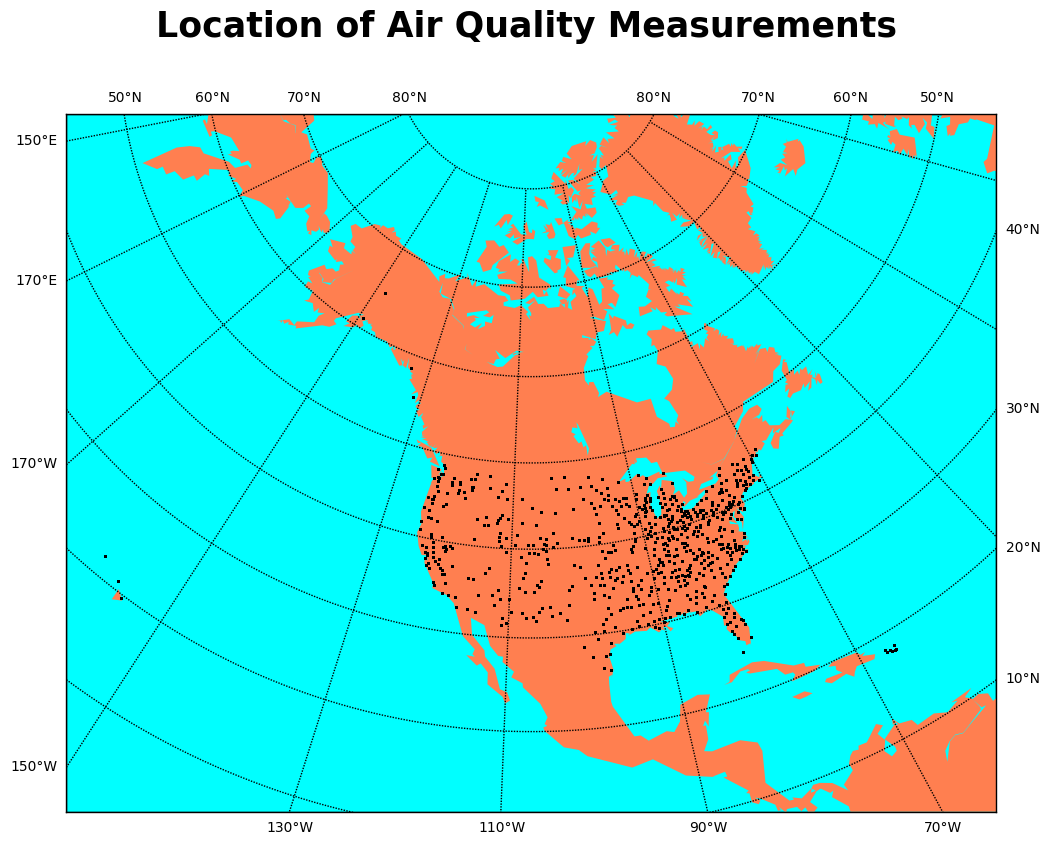

time: 4.34 s (started: 2024-11-27 13:24:29 -05:00)


In [16]:
#plots a map of sensor locations
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,12))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(aqi_data.lng.values,aqi_data.lat.values)
m.scatter(xpt,ypt, color='black', s=0.1)  # plot a blue dot there
plt.gcf().text(0.2, 0.85, 'Location of Air Quality Measurements', 
               {'size': 25, 'weight': 'bold'})
plt.show()

### Takeaways

<ul>
    <li><strong>Sensors are loacated only within the US or US territories.</strong></li>
    <li><strong>Alaska, Hawaii, and Puerto Rico are included in this dataset.</strong></li>
    <li><strong>Sensor locations are most sparse in the mid-west region of the US.</strong></li>
</ul>

# AQI Trends

<ul>
    <li><strong>AQI Trends - US Average</strong></li>
    <li><strong>AQI Trends - State Averages</strong></li>
    <li><strong>AQI Trends - Site Measurements</strong></li>
</ul>

In [17]:
# Sets pathces for different aqi levels
from matplotlib.patches import Patch
from copy import copy

GOOD = plt.Rectangle((-1_000,0), 17_500, 50, fc='green',ec="green", alpha=0.25)
MODERATE = plt.Rectangle((-1_000,50), 17_500, 50, fc='yellow',ec="yellow", alpha=0.25)
UNHEALTHY_FOR_SENSITIVE = plt.Rectangle((-1_000,100), 17_500, 50,
                                                  fc='orange',ec="orange", alpha=0.25)
UNHEALTHY = plt.Rectangle((-1_000,150), 17_500, 50, fc='red',ec="red", alpha=0.25)
VERY_UNHEALTHY = plt.Rectangle((-1_000,200), 17_500, 100, fc='purple',ec="purple", alpha=0.25)
HAZARDOUS = plt.Rectangle((-1_000,300), 17_500, 200, fc='maroon',ec="maroon", alpha=0.25)

time: 0 ns (started: 2024-11-27 13:24:38 -05:00)


## AQI Trends - US Average

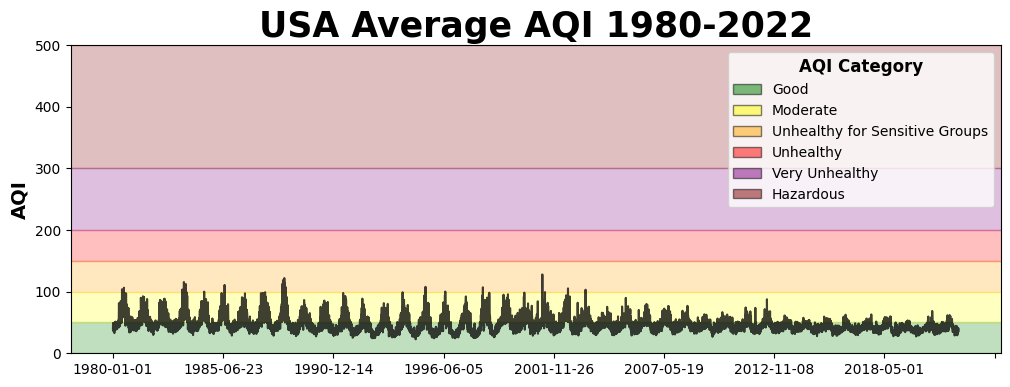

time: 516 ms (started: 2024-11-27 13:24:40 -05:00)


In [18]:
#plots time series of US average AQI
aqi_all_usa = aqi_data.groupby('Date').AQI.mean().loc[:'2022-01-01']

aqi_all_usa.plot(figsize=(12,4), color='black', alpha=0.75)
plt.title('USA Average AQI 1980-2022', {'size': 25, 'weight': 'bold'})

# adds color patches 
plt.gca().add_patch(copy(GOOD))
plt.gca().add_patch(copy(MODERATE))
plt.gca().add_patch(copy(UNHEALTHY_FOR_SENSITIVE))
plt.gca().add_patch(copy(UNHEALTHY))
plt.gca().add_patch(copy(VERY_UNHEALTHY))
plt.gca().add_patch(copy(HAZARDOUS))

plt.xlabel('')
plt.ylabel('AQI', {'size': 14, 'weight': 'bold'})

plt.ylim(0, 500)

#Sets up legend
legend_elements = [
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Good'),
    Patch(facecolor='yellow', edgecolor='black', alpha=0.5, label='Moderate'),
    Patch(facecolor='orange', edgecolor='black', alpha=0.5, label='Unhealthy for Sensitive Groups'),
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Unhealthy'),
    Patch(facecolor='purple', edgecolor='black', alpha=0.5, label='Very Unhealthy'),
    Patch(facecolor='maroon', edgecolor='black', alpha=0.5, label='Hazardous'),
                  ]


legend = plt.legend(handles=legend_elements)
legend.set_title("AQI Category", prop = {'size':12, 'weight': 'bold'})

#displays the plot
plt.show()

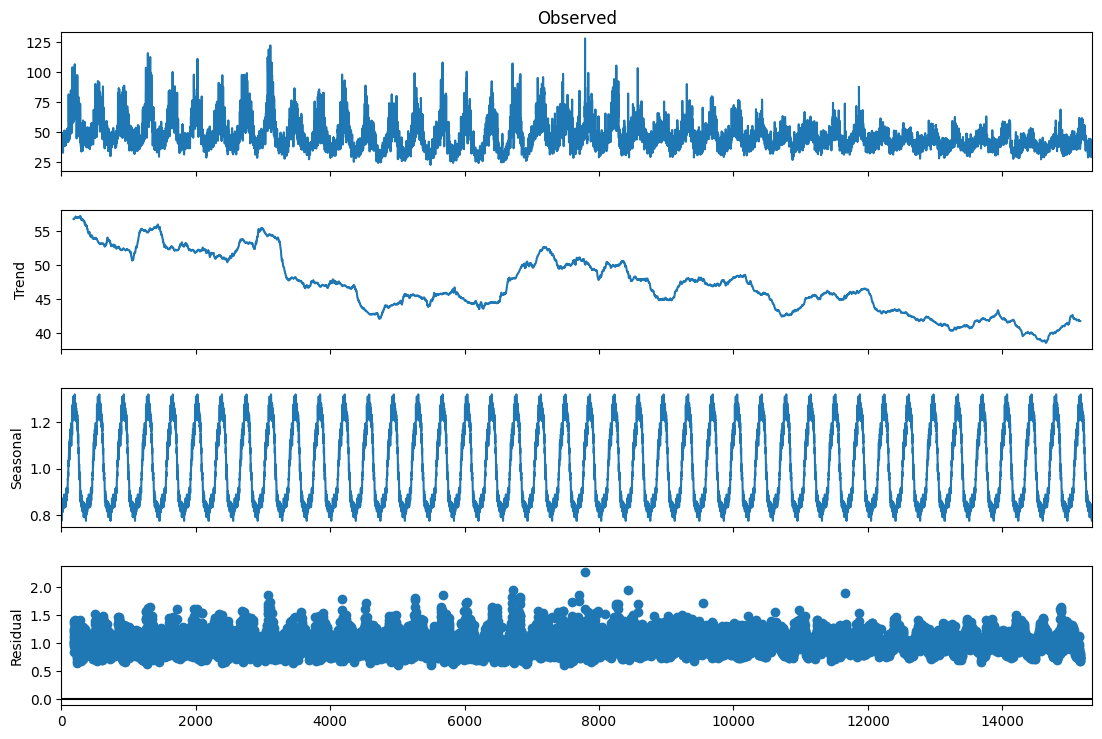

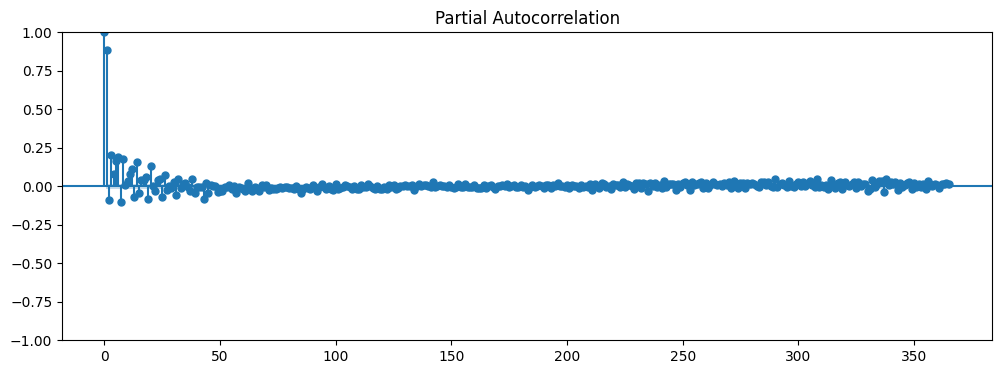

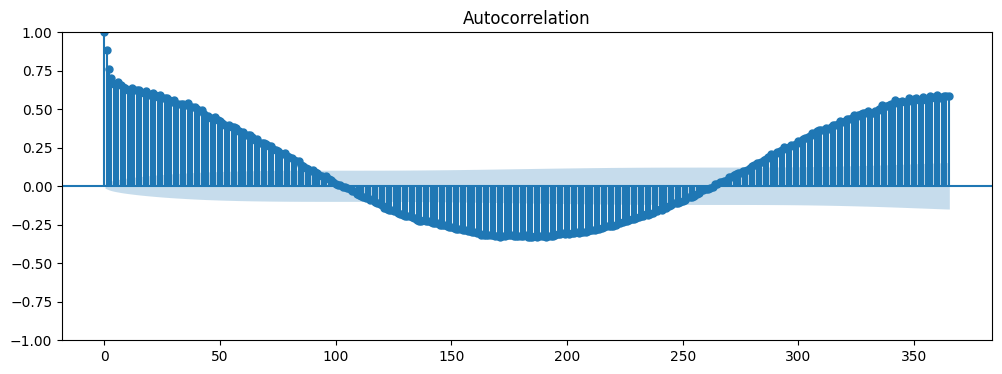

time: 28.6 s (started: 2024-11-27 13:24:43 -05:00)


In [19]:
#plots time series statistics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#decomposes time series seasonality, trend, and residual
seasonal_decompose(aqi_all_usa.values, model='multiplicative', period=365).plot()
plt.gcf().set_figheight(8)
plt.gcf().set_figwidth(12)
plt.show()

#plots partial autocorrelation function
plot_pacf(aqi_all_usa.values, lags=365)
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(12)
plt.show()

#plots autocorrelation function
plot_acf(aqi_all_usa.values, lags=365)
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(12)
plt.show()

#### How to Read the Above Plots

**Observed** - Actual AQI values

**Trend** - Yearly trend of AQI values extracted from *Observed*

**Seasonality** - Yearly seasonality of AQI values extracted from *Observed*

**Residual** - Left over error residuals when *Trend* and *Seasonality* are removed from *Observed*

**Partial Autocorrelation** - The direct correlation between timestep *x* and timestep *x-n* where n is the value of the x-axis and the correlation value is the y-axis

**Autocorrelation** - A combination of the direct and indirect correlation between timestep *x* and timestep *x-n* where n is the value of the x-axis and the correlation value is the y-axis

## AQI Trends - State Averages

In [20]:
#function to plot aqi given an area
def make_aqi_by_area_plot(df, area, clip_dates=True):
    if clip_dates:
        data = df.unstack().loc[area, :"2022-01-01"]
    else:
        data = df.unstack().loc[area]
        
    data.plot(figsize=(12,4), color='black', alpha=0.75)
    
    
    plt.title(f'{area} Average AQI 1980-2022', {'size': 25, 'weight': 'bold'})

    # adds color patches 
    plt.gca().add_patch(copy(GOOD))
    plt.gca().add_patch(copy(MODERATE))
    plt.gca().add_patch(copy(UNHEALTHY_FOR_SENSITIVE))
    plt.gca().add_patch(copy(UNHEALTHY))
    plt.gca().add_patch(copy(VERY_UNHEALTHY))
    plt.gca().add_patch(copy(HAZARDOUS))

    plt.xlabel('')
    plt.ylabel('AQI', {'size': 14, 'weight': 'bold'})
    
    plt.ylim(0, 500)
    
    #sets up legend
    legend_elements = [
        Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Good'),
        Patch(facecolor='yellow', edgecolor='black', alpha=0.5, label='Moderate'),
        Patch(facecolor='orange', edgecolor='black', alpha=0.5, label='Unhealthy for Sensitive Groups'),
        Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Unhealthy'),
        Patch(facecolor='purple', edgecolor='black', alpha=0.5, label='Very Unhealthy'),
        Patch(facecolor='maroon', edgecolor='black', alpha=0.5, label='Hazardous'),
                      ]

    legend = plt.legend(handles=legend_elements)
    legend.set_title("AQI Category", prop = {'size':12, 'weight': 'bold'})
    
    #display plot
    plt.show()

time: 0 ns (started: 2024-11-27 13:25:16 -05:00)


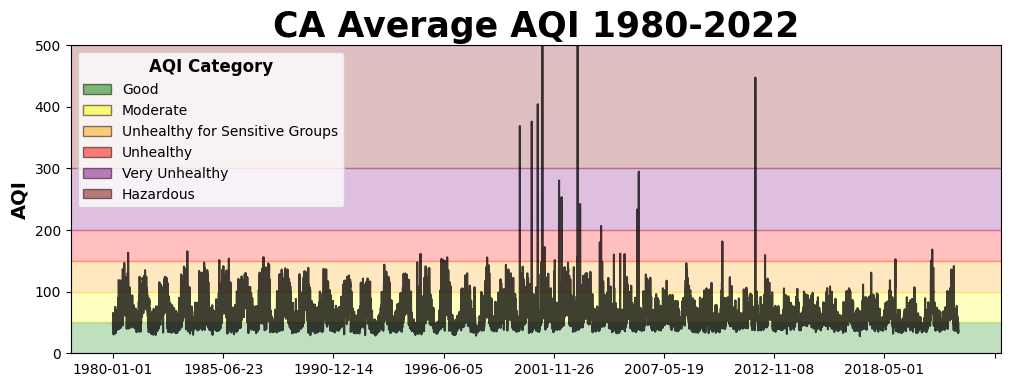

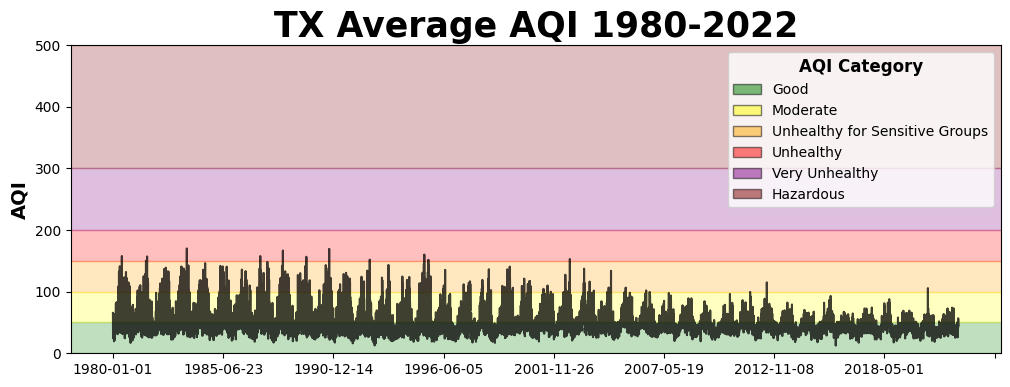

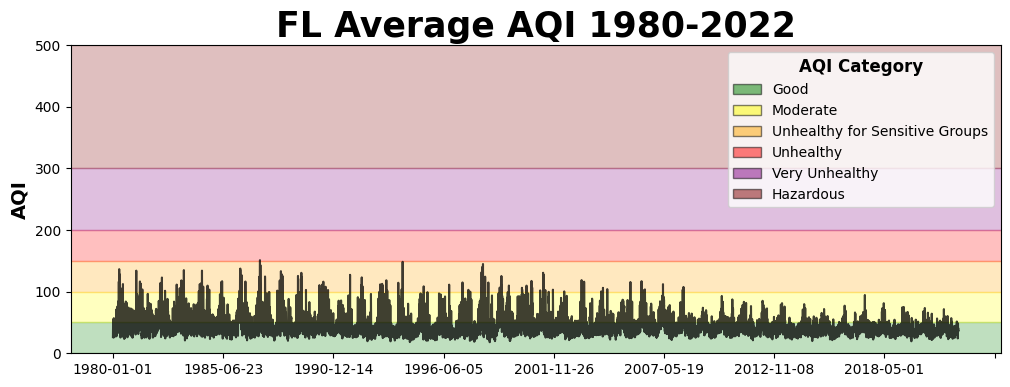

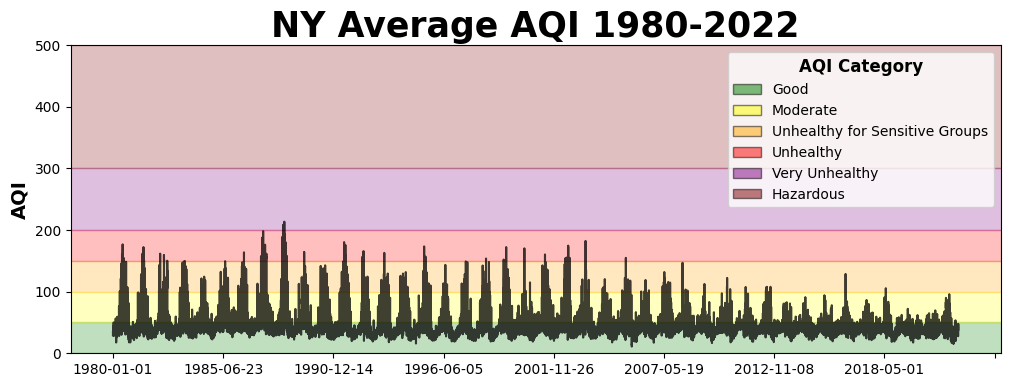

time: 1.89 s (started: 2024-11-27 13:25:20 -05:00)


In [21]:
#Makes dataframe of US State AQI averages
aqi_by_state = aqi_data.groupby(['state_id', 'Date']).AQI.mean()

#plots AQI averages for each state listed
for state in ['CA', 'TX', 'FL', 'NY']:
    make_aqi_by_area_plot(aqi_by_state, state)

## AQI Trends - Site Measurements

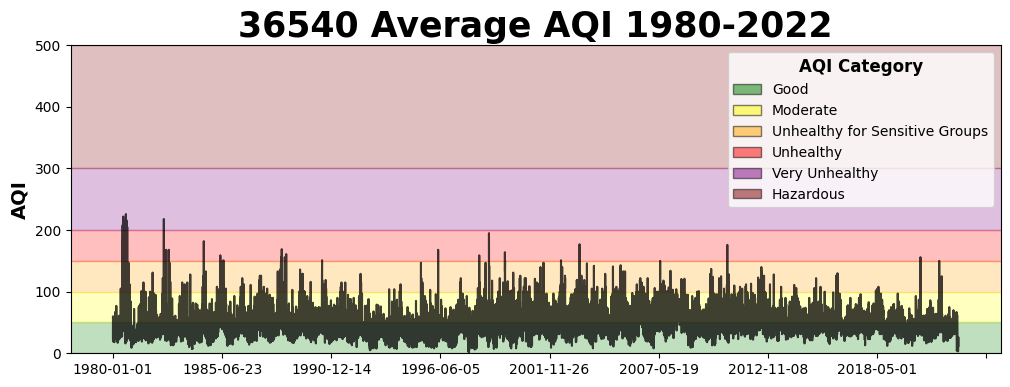

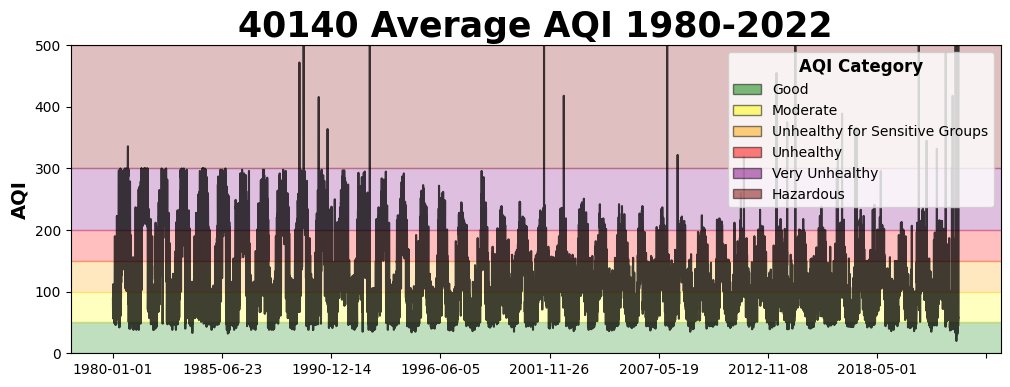

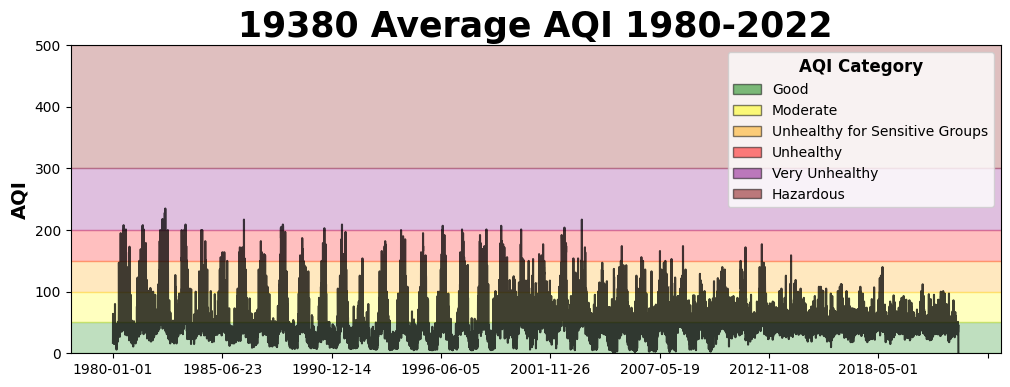

time: 3.86 s (started: 2024-11-27 13:25:25 -05:00)


In [22]:
#Makes dataframe of AQI by cbsa code
aqi_by_cbsa = aqi_data.groupby(['CBSA Code', 'Date']).AQI.mean()

#plots AQI for each cbsa code listed
for cbsa in [36540, 40140, 19380]:
    make_aqi_by_area_plot(aqi_by_cbsa, cbsa, clip_dates=False)

### Takeaways

<ul>
    <li><strong>AQI values and standard deviation are decreasing each year across the USA.</strong></li>
    <li><strong>There is a strong yearly seasonality to the AQI values.</strong></li>
    <li><strong>The current daily AQI value has a high direct correlation to the past 30 or so previous days.</strong></li>
    <li><strong>There are a few extreme AQI values in the California region - likely due to wildfires.</strong></li>
</ul>

# Missing Measurements

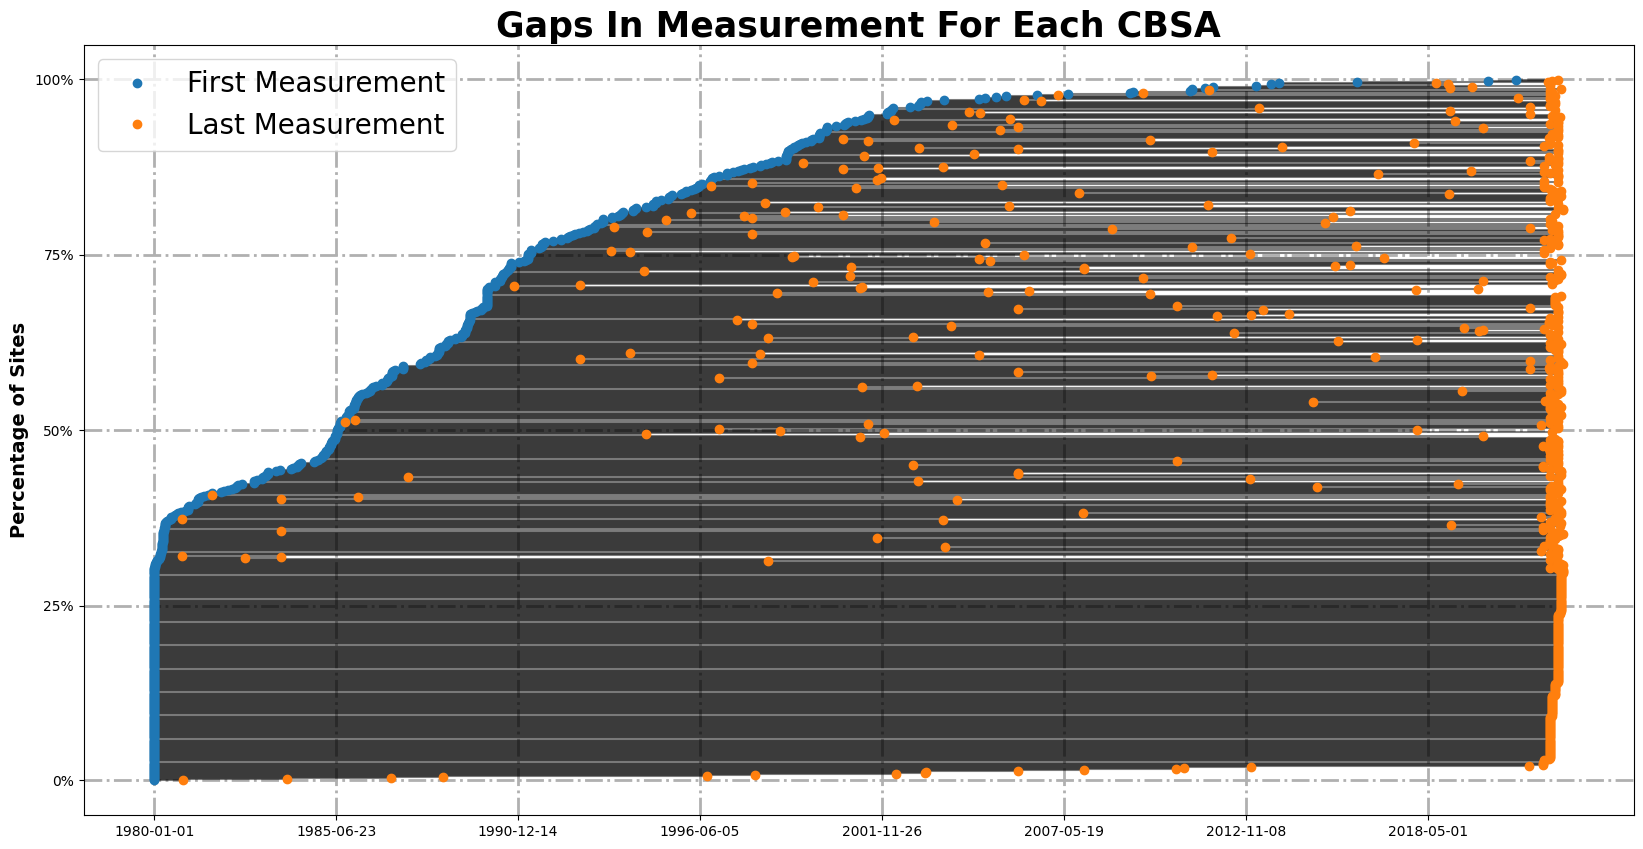

time: 1.31 s (started: 2024-11-27 13:25:31 -05:00)


In [23]:
#This cell plots the first measurement -> last measurement for each sensor
from datetime import timedelta, datetime

#group data by cbsa and get the first + last measurement
cbsa_grp = aqi_data.groupby('CBSA Code').agg({'Date': ['min', 'max', 'count']})

mins = pd.to_datetime(cbsa_grp[('Date',   'min')])
maxs = pd.to_datetime(cbsa_grp[('Date',   'max')])
min_date = mins.min()

a = mins - min_date
b = maxs - min_date
a = a.dt.days
b = b.dt.days


cbsa_grp['Start'] = a
cbsa_grp['End'] = b
                    
cbsa_grp = cbsa_grp.sort_values(['Start', 'End'], ascending=True)


plt.figure(figsize=(20,10))
plt.hlines(range(671), xmin=cbsa_grp['Start'],
            xmax=cbsa_grp['End'], color='black', 
            alpha=0.5)
plt.plot(cbsa_grp['Start'], range(671), "o", label='First Measurement')
plt.plot(cbsa_grp['End'], range(671), "o", label='Last Measurement')

plt.yticks([671, int(671*0.75), int(671*0.5), int(671*0.25), 0],
           ['100%', '75%', '50%', '25%', '0%'])
plt.xticks(range(0,16_000, 2_000), 
           [str(min_date + timedelta(days=days))[:10] for days in range(0,16_000, 2_000)])
plt.ylabel('Percentage of Sites', {'size': 14, 'weight': 'bold'})

plt.legend(fontsize=20)
plt.grid(axis='both', lw=2, linestyle='-.')

plt.title('Gaps In Measurement For Each CBSA', {'size': 25, 'weight': 'bold'})

plt.show()

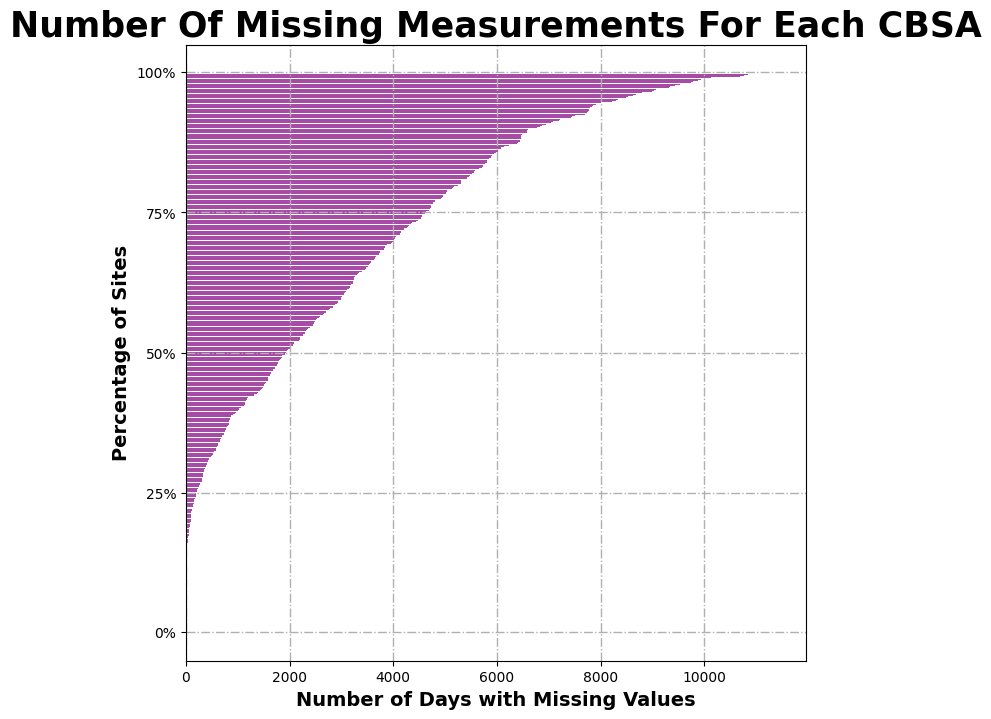

time: 609 ms (started: 2024-11-27 13:25:35 -05:00)


In [24]:
#This cell plots the number of missing measurements for each sensor
plt.figure(figsize=(8, 8))

plt.barh(range(671),
         ((cbsa_grp['End'] - cbsa_grp['Start']) - cbsa_grp[('Date', 'count')]+1).sort_values().values,
        color='purple', alpha=0.7)

plt.yticks([671, int(671*0.75), int(671*0.5), int(671*0.25), 0],
           ['100%', '75%', '50%', '25%', '0%'])
plt.ylabel('Percentage of Sites', {'size': 14, 'weight': 'bold'})
plt.xlabel('Number of Days with Missing Values', {'size': 14, 'weight': 'bold'})

plt.grid(axis='both', lw=1, linestyle='-.')
plt.title('Number Of Missing Measurements For Each CBSA', {'size': 25, 'weight': 'bold'})
plt.show()

### Takeaways

<ul>
    <li><strong>About 30% of all sensors start measurements in 1980.</strong></li>
    <li><strong>Almost 100% of sensors have a first measurement before 2010.</strong></li>
    <li><strong>Almost 100% of sensors have a last measurement in 2022.</strong></li>
    <li><strong>About 50% of sensors have less than 2,000 missing values (=5.5yrs).</strong></li>
</ul>

# Data Preprocessing

**1. Extract Timeseries Windows**

For each sensor, if there is a window of 37 consecutive measurements (no missing values) -> append to data array

**2. Scale Data**

Data will be scaled to have a mean of 0 and standard deviation of 1

**3. Split Into X and y**

The first 30 measurements will be X and the last 7 will be y

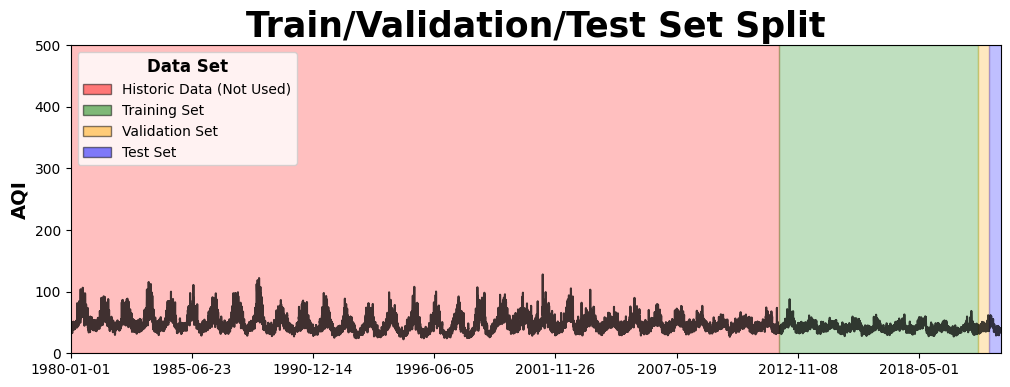

time: 203 ms (started: 2024-11-27 13:25:40 -05:00)


In [25]:
#plots the split of training, validation, and training data

aqi_all_usa.plot(figsize=(12,4), color='black', alpha=0.75)
plt.title('Train/Validation/Test Set Split', {'size': 25, 'weight': 'bold'})

# adds color patches 
historic = plt.Rectangle((-1_000,0), 12_688, 500, fc='red',ec="red", alpha=0.25)
train = plt.Rectangle((11_688,0), 3_287, 500, fc='green',ec="green", alpha=0.25)
validation = plt.Rectangle((14_975,0), 188, 500, fc='orange',ec="orange", alpha=0.25)
test = plt.Rectangle((15_163,0), 17_500, 500, fc='blue',ec="blue", alpha=0.25)


plt.gca().add_patch(historic)
plt.gca().add_patch(train)
plt.gca().add_patch(validation)
plt.gca().add_patch(test)


plt.xlabel('')
plt.ylabel('AQI', {'size': 14, 'weight': 'bold'})

plt.ylim(0, 500)
plt.xlim(0, 15_350)

#Sets up legend

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Historic Data (Not Used)'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Training Set'),
    Patch(facecolor='orange', edgecolor='black', alpha=0.5, label='Validation Set'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Test Set')
                  ]


legend = plt.legend(handles=legend_elements)
legend.set_title("Data Set", prop = {'size':12, 'weight': 'bold'})

#displays the plot
plt.show()

In [26]:
from concurrent.futures import ThreadPoolExecutor
import threading
import pandas as pd
import numpy as np
from datetime import timedelta

# Inicializar listas globales
train_windows = []
test_windows = []
val_windows = []

# Función que procesa cada índice de cbsa_grp
def process_cbsa(i):
    local_train_windows = []
    local_test_windows = []
    local_val_windows = []
    
    cbsa = cbsa_grp.index[i]
    temp_df = aqi_data[aqi_data['CBSA Code'] == cbsa]
    temp_df.index = pd.to_datetime(temp_df['Date'])

    temp_df = temp_df.loc[:, 'AQI']  # Obtener valores de AQI

    start_date = temp_df.index.min()  # Primera medición
    end_date = temp_df.index.max()    # Última medición

    # Rellenar fechas faltantes con np.NaN
    new_index = pd.date_range(start_date, end_date, freq='D')
    filler_aqi = [np.NaN for _ in new_index]

    filler = pd.DataFrame({'Fill_AQI': filler_aqi}, index=new_index)
    temp = filler.join(temp_df)

    aqi_vals = temp.AQI.values
    ix = 0

    # Procesar ventanas de 37 días
    while ix < aqi_vals.shape[0] - 37:
        window = aqi_vals[ix: ix + 37]

        # Validar ventanas sin valores faltantes
        if (np.isnan(window).sum() == 0) and ((start_date + timedelta(days=ix)).year > 2011):
            curr_time = start_date + timedelta(days=ix)

            # Clasificar datos en conjuntos
            if curr_time.year == 2021:
                if curr_time.month > 6:
                    local_test_windows.append([w if w <= 500 else 500 for w in window])
                else:
                    local_val_windows.append([w if w <= 500 else 500 for w in window])
            else:
                local_train_windows.append([w if w <= 500 else 500 for w in window])
        ix += 1

    return local_train_windows, local_val_windows, local_test_windows

# Función que incluye el registro del hilo actual
def process_cbsa_debug(i):
    print(f"Procesando índice {i} en hilo: {threading.current_thread().name}")
    return process_cbsa(i)

# Ejecutar paralelización
num_threads = 16
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    results = list(executor.map(process_cbsa_debug, range(cbsa_grp.shape[0])))

# Consolidar resultados
for train, val, test in results:
    train_windows.extend(train)
    val_windows.extend(val)
    test_windows.extend(test)

# Mostrar resultados
print('NUMBER OF TRAINING DATA SAMPLES:', len(train_windows))
print('NUMBER OF VALIDATION DATA SAMPLES:', len(val_windows))
print('NUMBER OF TESTING DATA SAMPLES:', len(test_windows))

Procesando índice 0 en hilo: ThreadPoolExecutor-2_0
Procesando índice 1 en hilo: ThreadPoolExecutor-2_1
Procesando índice 2 en hilo: ThreadPoolExecutor-2_2
Procesando índice 3 en hilo: ThreadPoolExecutor-2_3
Procesando índice 4 en hilo: ThreadPoolExecutor-2_4
Procesando índice 5 en hilo: ThreadPoolExecutor-2_5
Procesando índice 6 en hilo: ThreadPoolExecutor-2_6
Procesando índice 7 en hilo: ThreadPoolExecutor-2_7
Procesando índice 8 en hilo: ThreadPoolExecutor-2_8
Procesando índice 9 en hilo: ThreadPoolExecutor-2_0
Procesando índice 10 en hilo: ThreadPoolExecutor-2_9
Procesando índice 11 en hilo: ThreadPoolExecutor-2_10
Procesando índice 12 en hilo: ThreadPoolExecutor-2_11
Procesando índice 13 en hilo: ThreadPoolExecutor-2_1
Procesando índice 14 en hilo: ThreadPoolExecutor-2_12
Procesando índice 15 en hilo: ThreadPoolExecutor-2_13
Procesando índice 16 en hilo: ThreadPoolExecutor-2_2
Procesando índice 17 en hilo: ThreadPoolExecutor-2_15Procesando índice 18 en hilo: ThreadPoolExecutor-2_3

In [27]:
#from sklearn.preprocessing import StandardScaler

#train_meta_data = np.array(train_meta_data)
#test_meta_data = np.array(test_meta_data)
#val_meta_data = np.array(val_meta_data)

#ss_meta = StandardScaler()
#train_meta_data = ss_meta.fit_transform(train_meta_data)
#test_meta_data = ss_meta.transform(test_meta_data)
#val_meta_data = ss_meta.transform(val_meta_data)

# 2. Scale Data
aqi_mean = np.array(train_windows).mean() #mean of training set
aqi_std = np.array(train_windows).std() #standard deviation of training set

#scales data
train_windows = (np.array(train_windows) - aqi_mean) / aqi_std
test_windows = (np.array(test_windows) - aqi_mean) / aqi_std
val_windows = (np.array(val_windows) - aqi_mean) / aqi_std


# 3. Split Into X and y
train_X = train_windows[:, :-7]
train_X = train_X.reshape(train_X.shape[0], 30, 1)
train_y = train_windows[:, -7:]

test_X = test_windows[:, :-7]
test_X = test_X.reshape(test_X.shape[0], 30, 1)
test_y = test_windows[:, -7:]

val_X = val_windows[:, :-7]
val_X = val_X.reshape(val_X.shape[0], 30, 1)
val_y = val_windows[:, -7:]


#display a sample of data
print("SAMPLE OF PREPROCCESED DATA SET")
print("======================================")
print("X:", train_X[0])
print("y:", train_y[0])

SAMPLE OF PREPROCCESED DATA SET
X: [[-0.74127998]
 [-0.69626552]
 [-0.60623662]
 [-0.87632334]
 [-0.96635224]
 [-1.23643896]
 [-0.56122217]
 [-0.78629443]
 [-0.78629443]
 [-0.87632334]
 [-0.83130888]
 [-0.78629443]
 [-1.1013956 ]
 [-0.60623662]
 [-0.47119326]
 [-0.78629443]
 [-0.87632334]
 [-0.69626552]
 [-0.83130888]
 [-0.60623662]
 [-0.74127998]
 [-0.56122217]
 [-0.60623662]
 [-0.96635224]
 [-0.87632334]
 [-1.23643896]
 [-0.74127998]
 [-0.51620771]
 [-0.47119326]
 [-0.47119326]]
y: [-0.3361499  -0.47119326 -0.74127998 -0.74127998 -0.56122217 -0.60623662
 -0.24612099]
time: 9.98 s (started: 2024-11-27 13:28:22 -05:00)


In [28]:
aqi_mean

43.467599332161555

time: 0 ns (started: 2024-11-27 13:28:35 -05:00)


In [29]:
aqi_std

22.21508718833175

time: 0 ns (started: 2024-11-27 13:28:37 -05:00)


# Model Definition

The model will be built with the following architecture:
**LSTM (3) -> Dense (2) -> Output**

In [30]:
#Defines Model Architecture
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(30, 1)), 
    Bidirectional(LSTM(50, dropout=0.3, return_sequences=True)),
    Bidirectional(LSTM(50, dropout=0.3, return_sequences=True)),
    Bidirectional(LSTM(50, dropout=0.3)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    #Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(7)
])

model.compile(
    loss='mae',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['mse']
)

time: 4.3 s (started: 2024-11-27 13:28:42 -05:00)


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional


# Definir EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10  # Cambiado de 25 a 10
)
# Definir el número de ejemplos que deseas usar
num_samples = 500

# Obtener índices aleatorios de manera eficiente
indices = np.random.choice(train_X.shape[0], num_samples, replace=False)

# Crear subconjuntos
train_X_subset = train_X[indices]
train_y_subset = train_y[indices]

# Crear un pipeline de datos usando tf.data
train_dataset = tf.data.Dataset.from_tensor_slices((train_X_subset, train_y_subset))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64).prefetch(tf.data.experimental.AUTOTUNE)

history = model.fit(
    train_dataset,
    validation_data=(val_X, val_y),
    epochs=5,  # Cambiado a 5 épocas
    batch_size=64,  # Cambiado de 4096 a 64
    callbacks=[early_stop],
    verbose=1  # Cambiado a 1 para ver el progreso
)

print("MODEL SUMMARY")
print("==========================")

model.summary()

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.6097 - mse: 0.7670 - val_loss: 0.6529 - val_mse: 0.9575
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.5903 - mse: 0.7578 - val_loss: 0.6522 - val_mse: 0.9554
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.5921 - mse: 0.7134 - val_loss: 0.6515 - val_mse: 0.9533
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 0.6269 - mse: 0.8911 - val_loss: 0.6508 - val_mse: 0.9513
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.6128 - mse: 0.7511 - val_loss: 0.6501 - val_mse: 0.9494
MODEL SUMMARY


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 100)        │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 30, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,191 (1.66 MB)

 Trainable params: 145,063 (566.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 290,128 (1.11 MB)

time: 1min 10s (started: 2024-11-27 13:29:39 -05:00)


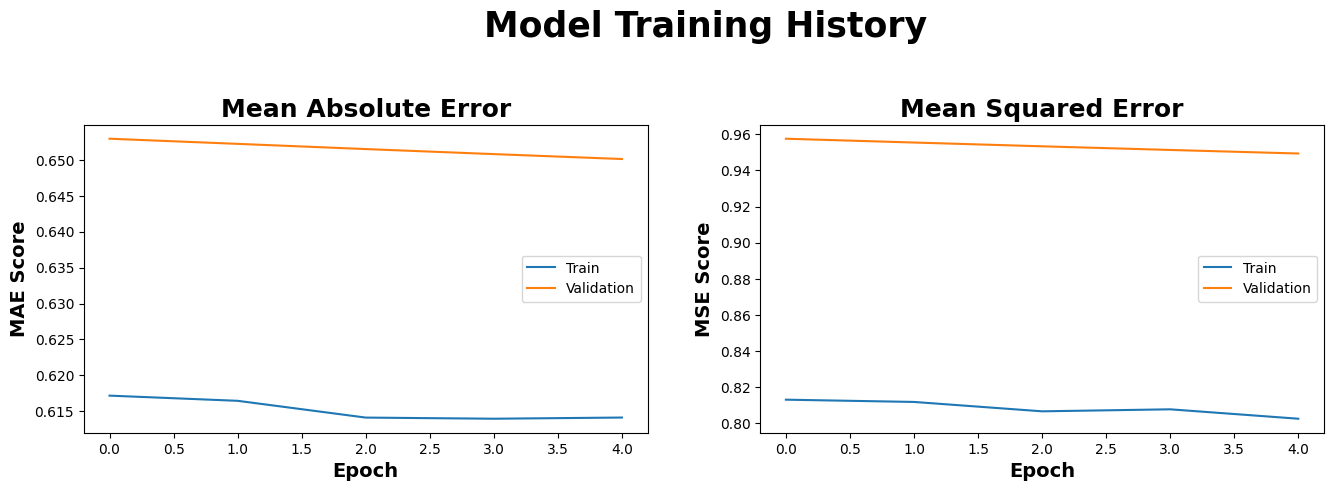

time: 296 ms (started: 2024-11-27 13:32:04 -05:00)


In [32]:
#plots the models training history

fig, axs = plt.subplots(1, 2, figsize=(16,4))

axs[0].plot(history.history['loss'], label='Train')
axs[0].plot(history.history['val_loss'], label='Validation')
axs[0].set_xlabel('Epoch', {'size': 14, 'weight': 'bold'})
axs[0].set_ylabel('MAE Score', {'size': 14, 'weight': 'bold'})
axs[0].set_title('Mean Absolute Error', {'size': 18, 'weight': 'bold'})
axs[0].legend()

axs[1].plot(history.history['mse'], label='Train')
axs[1].plot(history.history['val_mse'], label='Validation')
axs[1].set_xlabel('Epoch', {'size': 14, 'weight': 'bold'})
axs[1].set_ylabel('MSE Score', {'size': 14, 'weight': 'bold'})
axs[1].set_title('Mean Squared Error', {'size': 18, 'weight': 'bold'})
axs[1].legend()

fig.text(0.375, 1.1,"Model Training History", {'size': 25, 'weight': 'bold'})

plt.show()

# Model Evaluation

The model will be evaluated based on the RSME of AQI predictions and actual AQI values. 
The model predicts AQI values up to 7 days in advance. Each prediction timestep will be analyzed. 
A **successful model will beat a baseline and have an RSME under 20 for all timesteps**.

**Baseline:**
The baseline model will predict the AQI mean for every value. 

In [33]:
#Rescales data/ predictions back to normal values

train_preds = (model.predict(train_X_subset) * aqi_std) + aqi_mean
val_preds = (model.predict(val_X) * aqi_std) + aqi_mean
test_preds = (model.predict(test_X) * aqi_std) + aqi_mean

train_y_real = train_y  * aqi_std + aqi_mean
val_y_real = val_y  * aqi_std + aqi_mean
test_y_real = test_y  * aqi_std + aqi_mean


train_baseline = np.array([aqi_mean for a in train_y_real[:, 0]])
val_baseline = np.array([aqi_mean for a in val_y_real[:, 0]])
test_baseline = np.array([aqi_mean for a in test_y_real[:, 0]])

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
2317/2317 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step
2168/2168 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step
time: 36 s (started: 2024-11-27 13:32:13 -05:00)


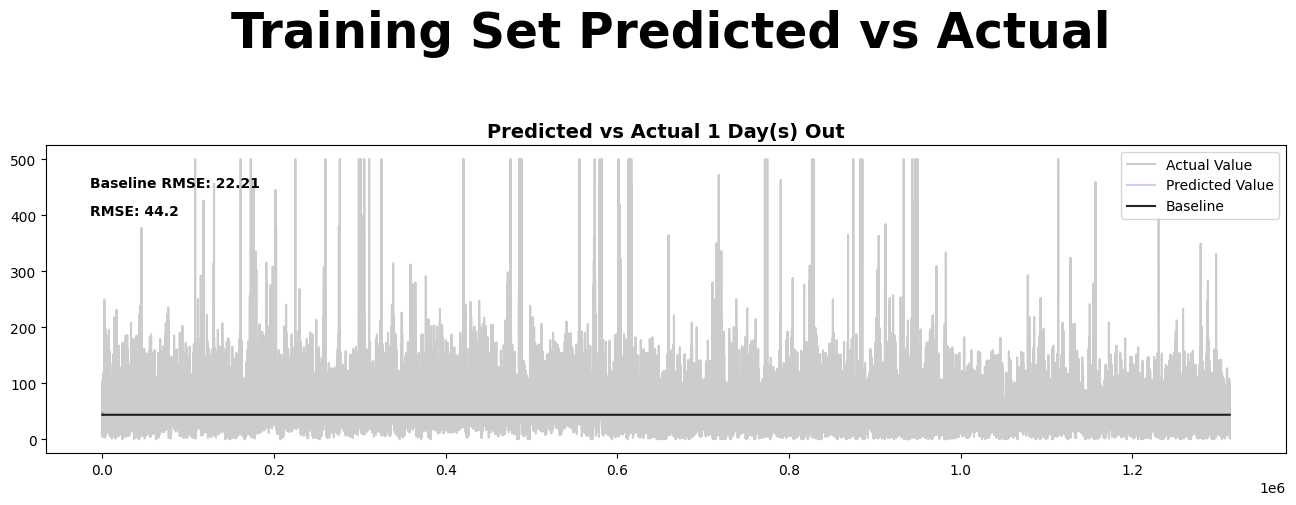

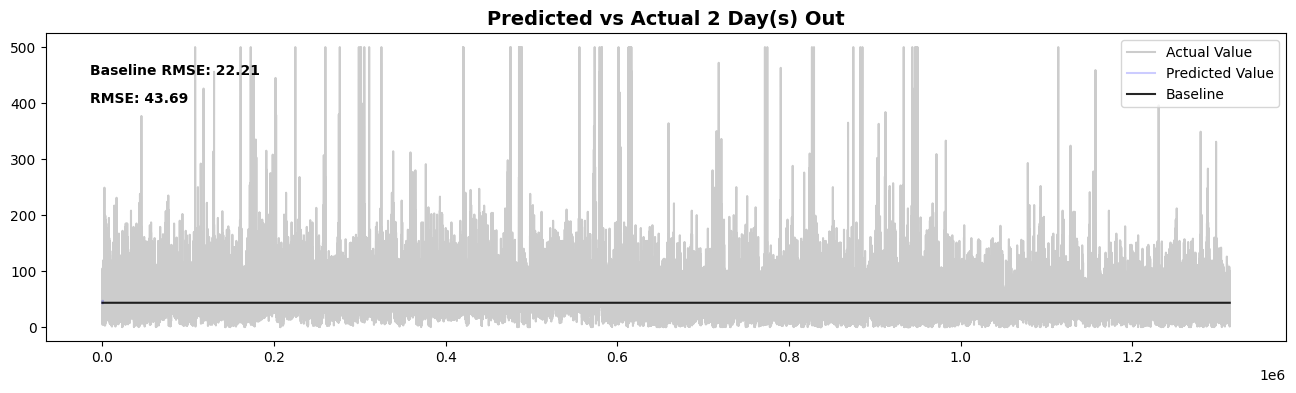

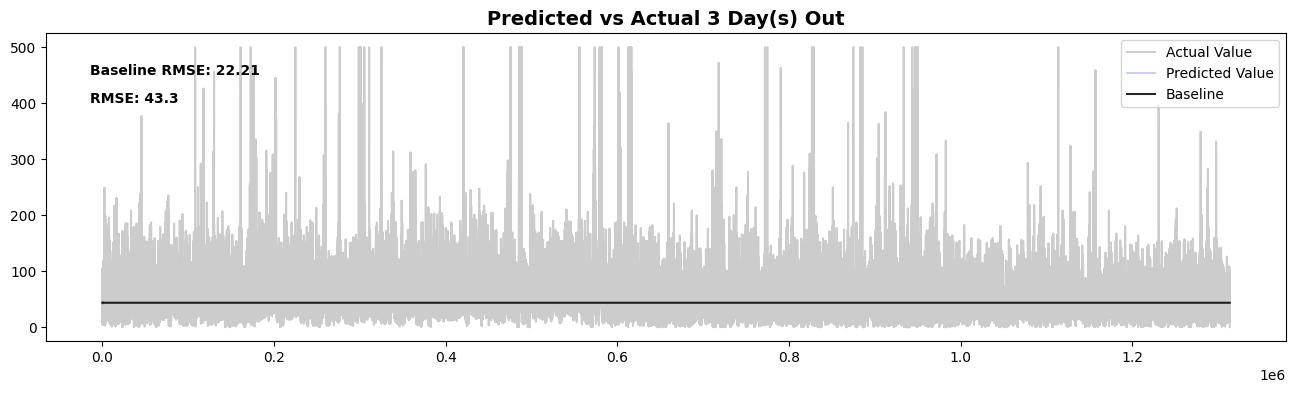

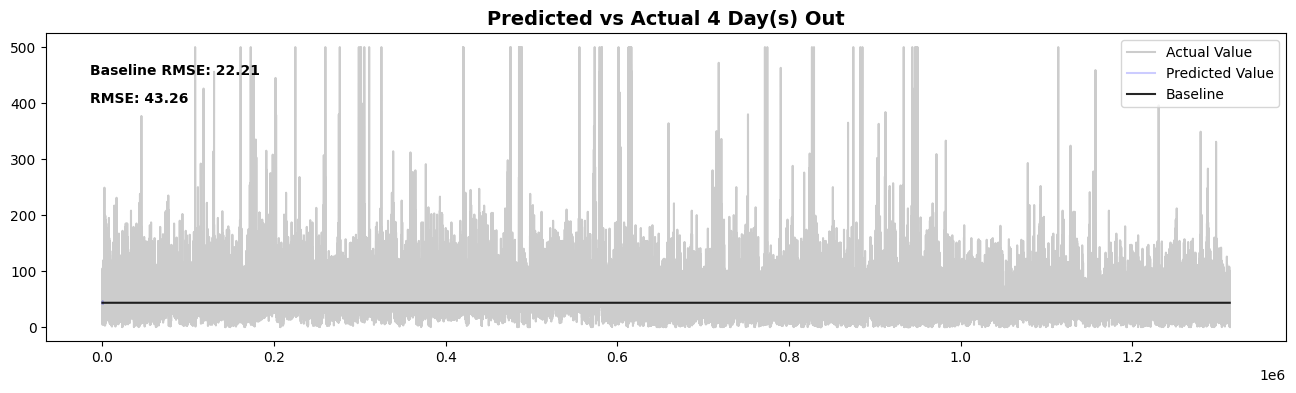

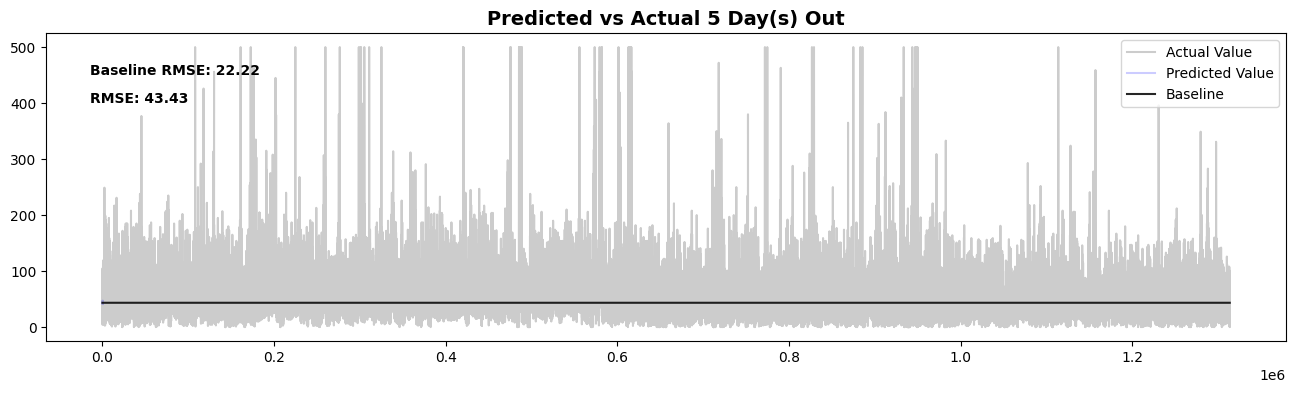

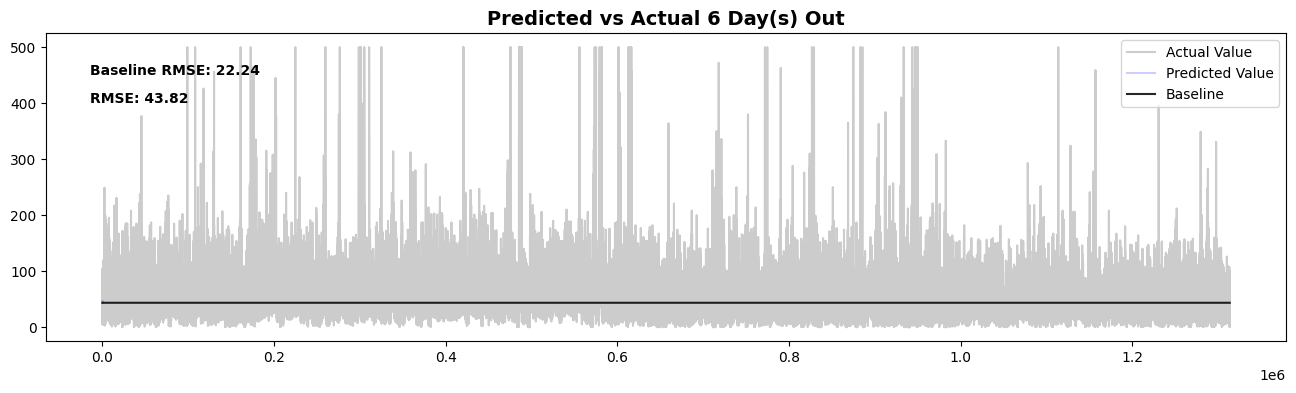

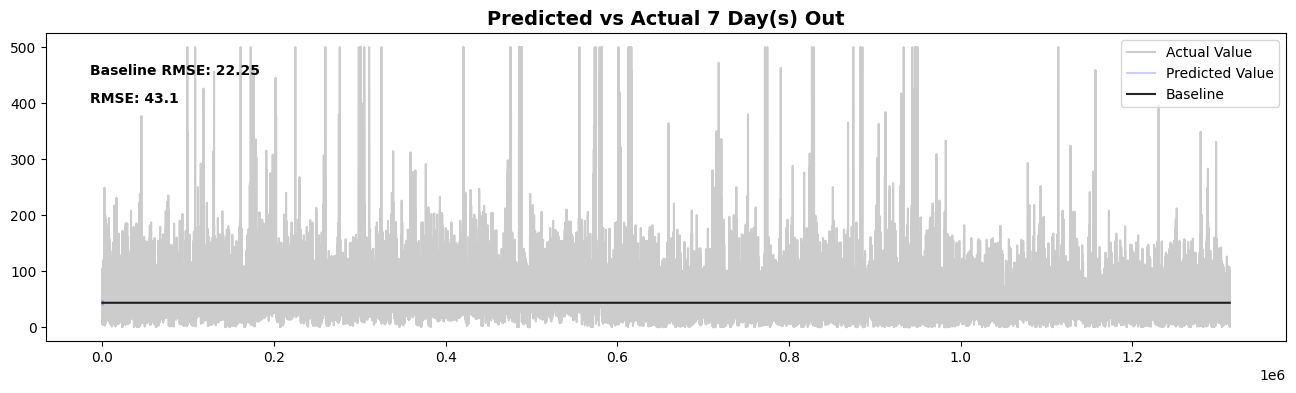

time: 4.51 s (started: 2024-11-27 13:32:54 -05:00)


In [34]:
from sklearn.metrics import mean_squared_error as mse

#plots training data error
for i in range(7):    
    plt.figure(figsize=(16, 4))
    rsme = round(np.sqrt(mse(train_y_subset[:, i], train_preds[:, i])), 2)
    baseline_rsme = round(np.sqrt(mse(train_y_real[:, i], train_baseline)), 2)
    plt.plot(train_y_real[:, i], color='black', alpha=0.2, label='Actual Value')
    plt.plot(train_preds[:, i], color='blue', alpha=0.2, label='Predicted Value')
    plt.plot(train_baseline, color='black', alpha=0.85, label='Baseline')
    plt.text(-15_000,400, "RMSE: {rsme}".format(rsme=rsme), {'size': 10, 'weight': 'bold'})
    plt.text(-15_000,450, "Baseline RMSE: {rsme}".format(rsme=baseline_rsme), {'size': 10, 'weight': 'bold'})
    plt.title('Predicted vs Actual {day} Day(s) Out'.format(day=i+1), {'size': 14, 'weight': 'bold'})
    plt.legend(loc='upper right')
    if i == 0:
        plt.text(0.15e6, 700, "Training Set Predicted vs Actual", {'size': 35, 'weight': 'bold'})
    plt.show()

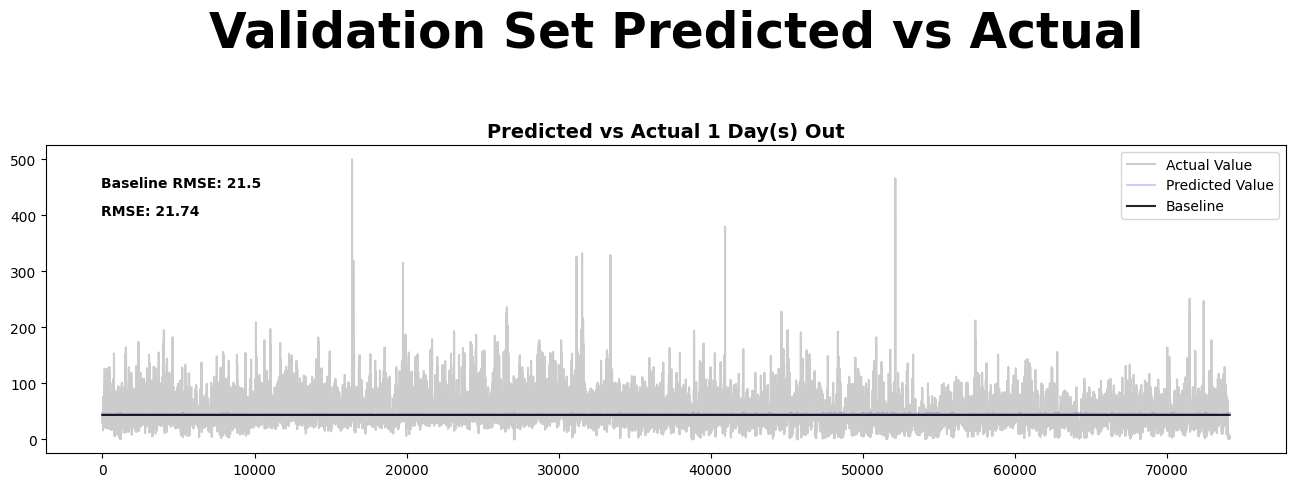

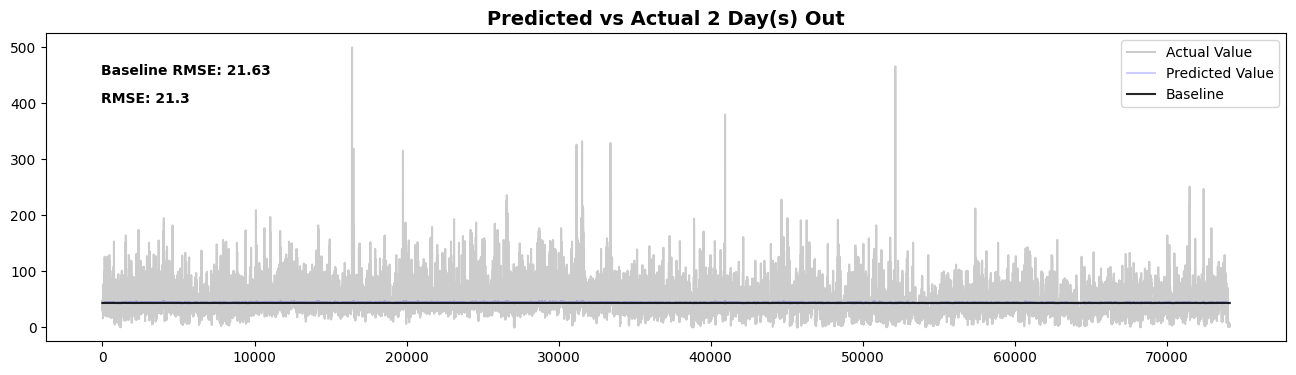

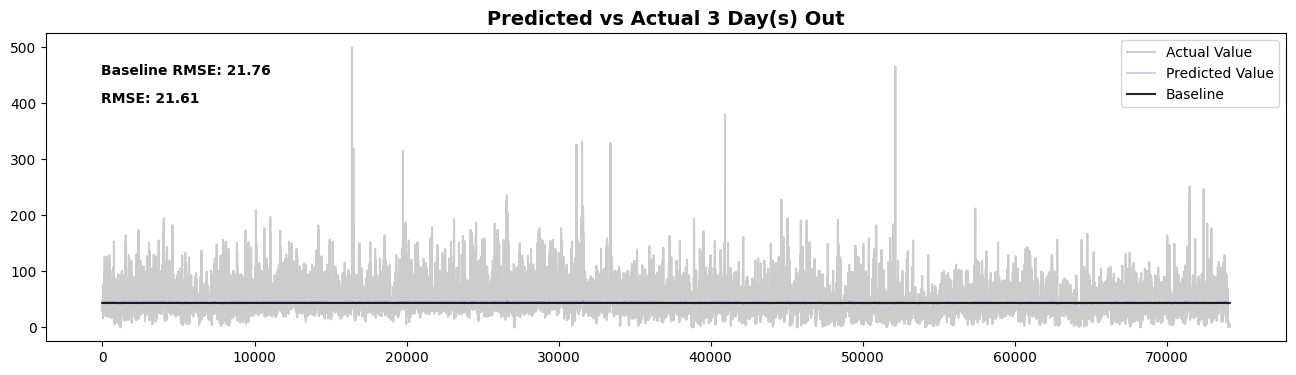

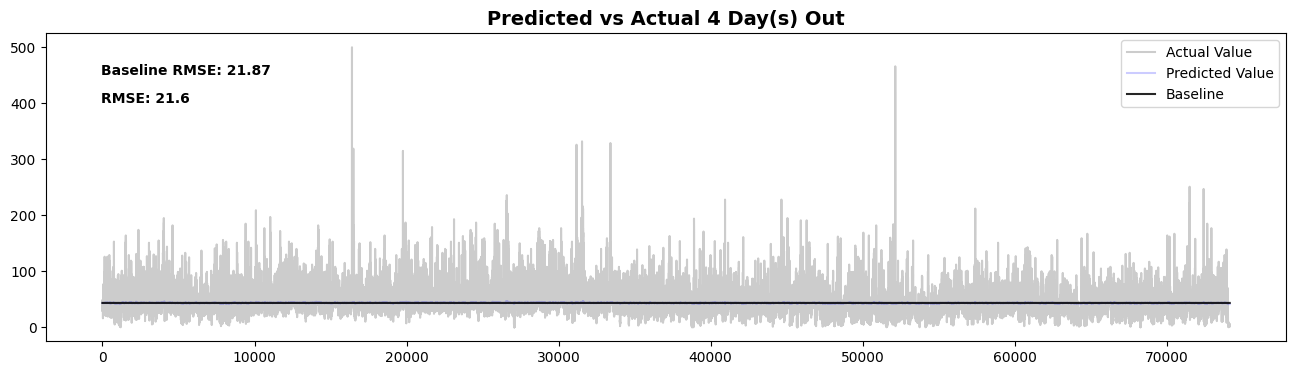

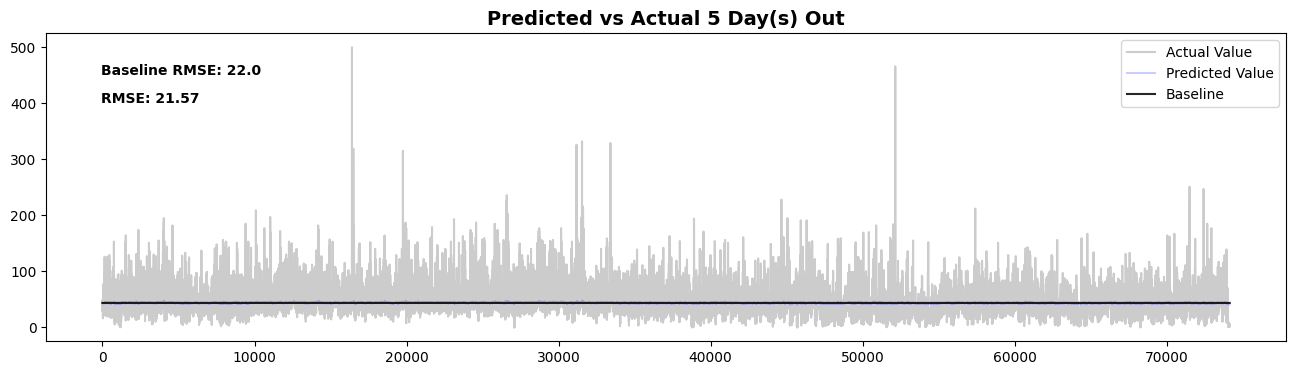

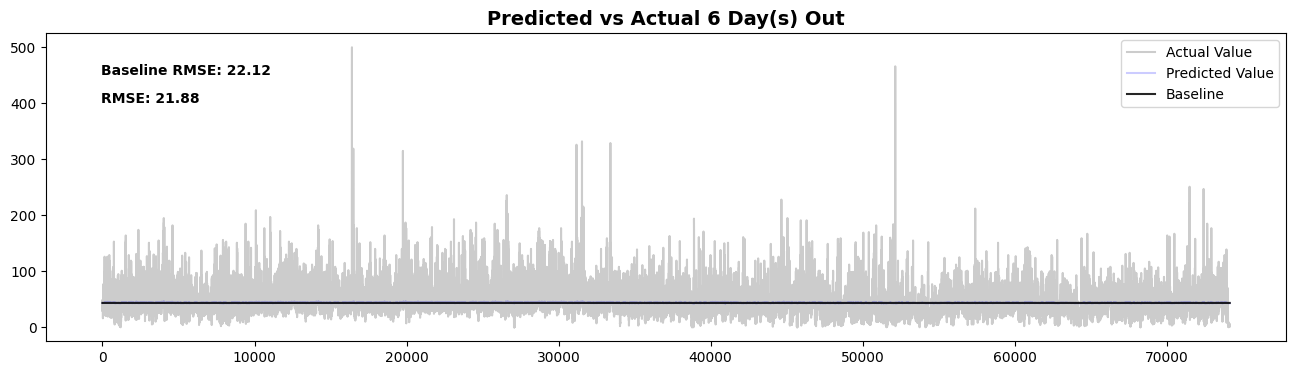

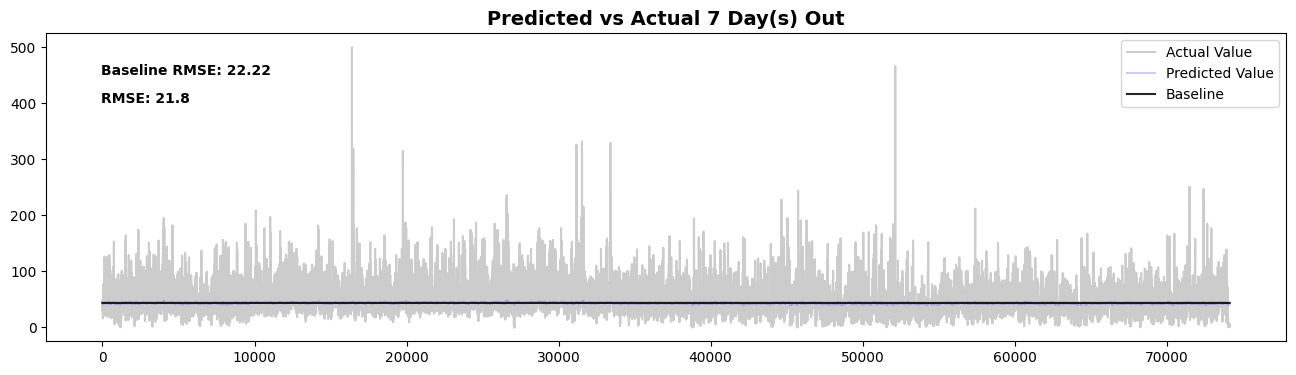

time: 1.53 s (started: 2024-11-27 13:33:17 -05:00)


In [35]:
#plots validation set data
for i in range(7):    
    plt.figure(figsize=(16, 4))
    rsme = round(np.sqrt(mse(val_y_real[:, i], val_preds[:, i])), 2)
    baseline_rsme = round(np.sqrt(mse(val_y_real[:, i], val_baseline)), 2)
    plt.plot(val_y_real[:, i], color='black', alpha=0.2, label='Actual Value')
    plt.plot(val_preds[:, i], color='blue', alpha=0.2, label='Predicted Value')
    plt.plot(val_baseline, color='black', alpha=0.85, label='Baseline')
    plt.text(-100,400, "RMSE: {rsme}".format(rsme=rsme), {'size': 10, 'weight': 'bold'})
    plt.text(-100,450, "Baseline RMSE: {rsme}".format(rsme=baseline_rsme), {'size': 10, 'weight': 'bold'})
    plt.title('Predicted vs Actual {day} Day(s) Out'.format(day=i+1), {'size': 14, 'weight': 'bold'})
    plt.legend(loc='upper right')
    if i == 0:
        plt.text(7_000, 700, "Validation Set Predicted vs Actual", {'size': 35, 'weight': 'bold'})
    plt.show()

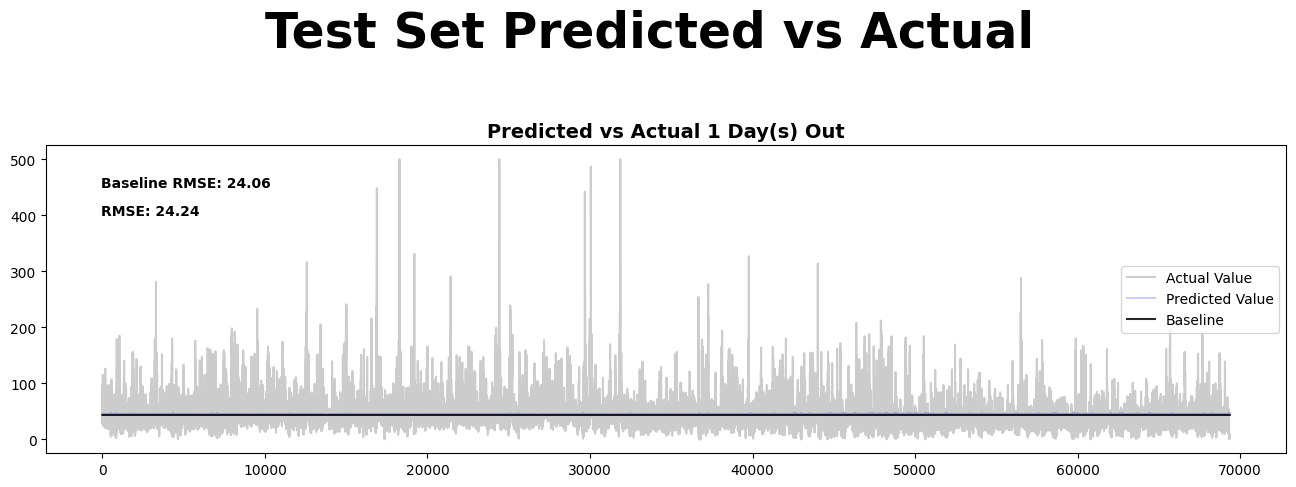

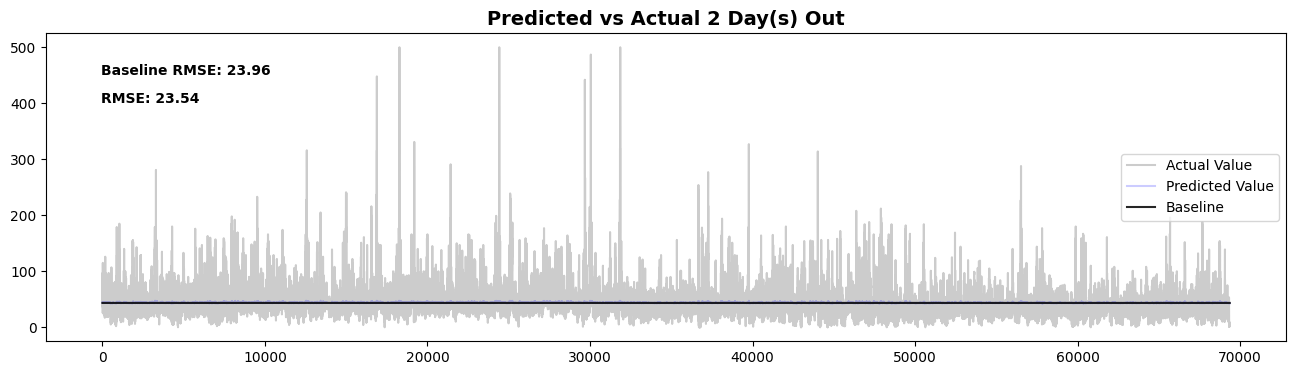

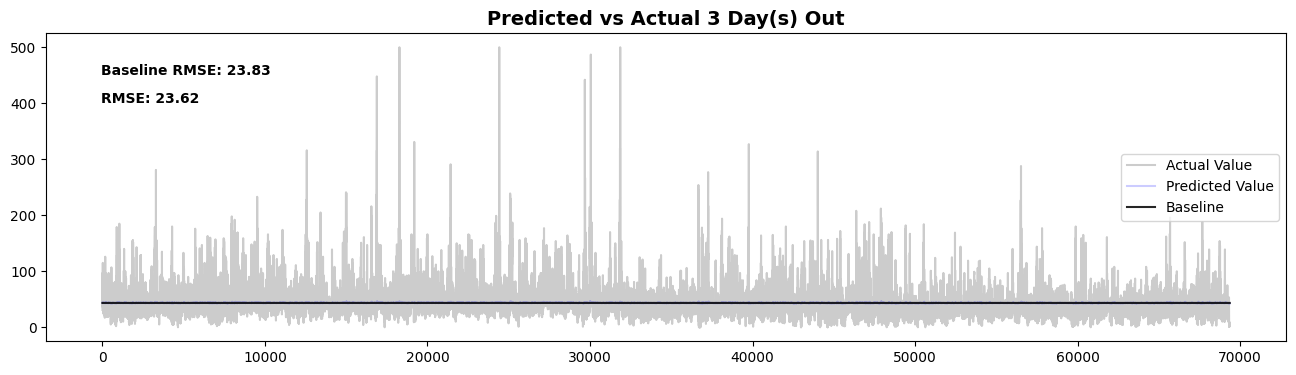

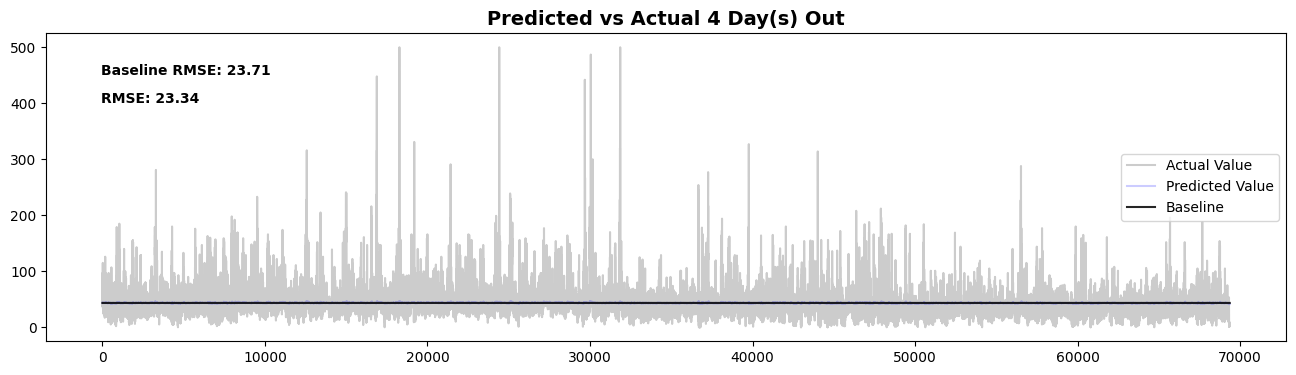

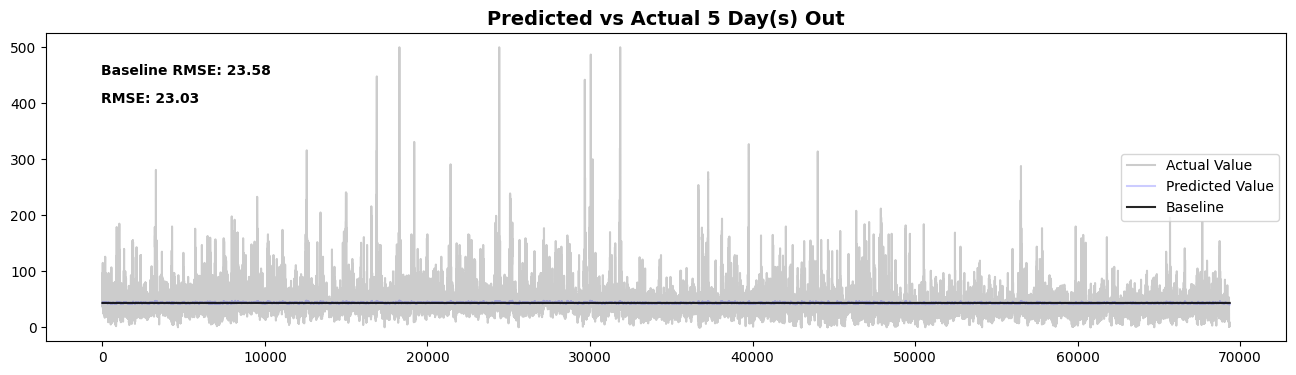

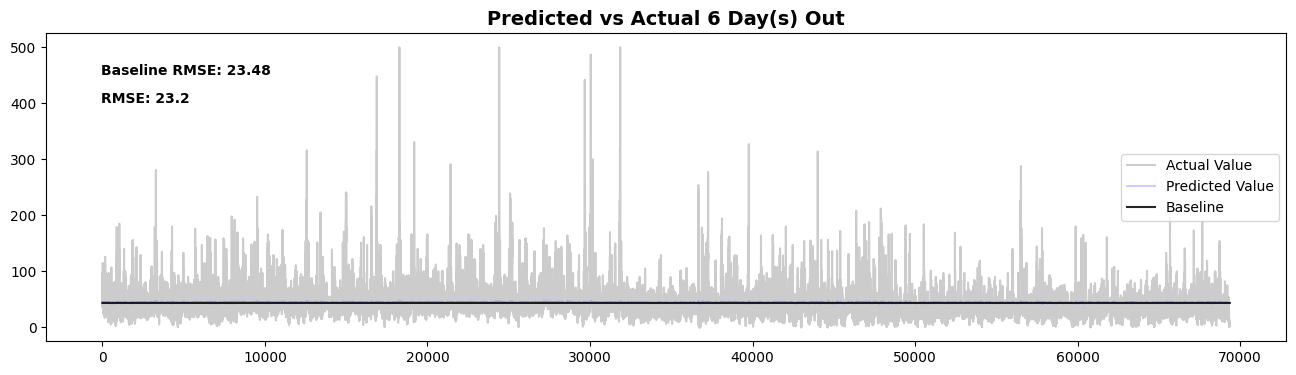

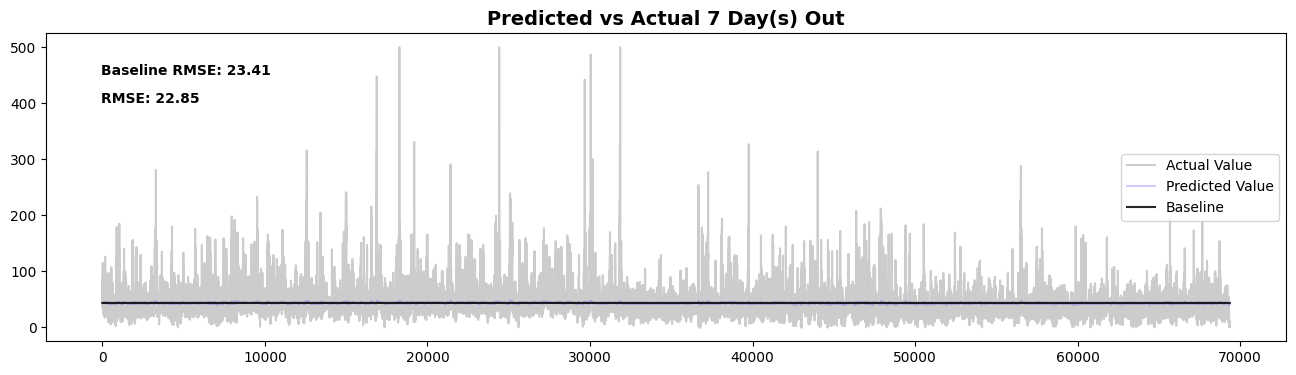

time: 1.55 s (started: 2024-11-27 13:33:22 -05:00)


In [36]:
#plots test data error
for i in range(7):    
    plt.figure(figsize=(16, 4))
    rsme = round(np.sqrt(mse(test_y_real[:, i], test_preds[:, i])), 2)
    baseline_rsme = round(np.sqrt(mse(test_y_real[:, i], test_baseline)), 2)
    plt.plot(test_y_real[:, i], color='black', alpha=0.2, label='Actual Value')
    plt.plot(test_preds[:, i], color='blue', alpha=0.2, label='Predicted Value')
    plt.plot(test_baseline, color='black', alpha=0.85, label='Baseline')
    plt.text(-100,400, "RMSE: {rsme}".format(rsme=rsme), {'size': 10, 'weight': 'bold'})
    plt.text(-100,450, "Baseline RMSE: {rsme}".format(rsme=baseline_rsme), {'size': 10, 'weight': 'bold'})
    plt.title('Predicted vs Actual {day} Day(s) Out'.format(day=i+1), {'size': 14, 'weight': 'bold'})
    plt.legend(loc='right')
    if i == 0:
        plt.text(10_000, 700, "Test Set Predicted vs Actual", {'size': 35, 'weight': 'bold'})
    plt.show()

# Conclusion

<ul>
    <li><strong>AQI levels have been dropping each decade</strong></li>
    <li><strong>AQI is autocorrelated and can be predicted based on previous values</strong></li>
    <li><strong>A model with RSME &#60; 20 was successfully created</strong></li>
</ul>

### Way Forward

The model created here is acceptable for *OpenAQI.io*'s V1 model. However, there are many ways to improve the predictive performance of future models. 

1. Add weather data to dataset (wind/temperature/precipitation)
2. Add locational data to dataset (coordinates/population)
3. Increase timestep granularity (instead of daily, find hourly data)
4. Tweak model architecture to be aware of all sensors at each timestep (graph neural network)